In [1]:
import cv2
import json
import h5py
import glob
import numpy as np
import pandas as pd
from PIL import Image

HR_flist = sorted(glob.glob("/data/SR-Hist-Foundation/HR_test/*.png"))

def gen_mask(json_path):
    with open(json_path, "r") as f:
        json_obj = json.load(f)
    
    obj_mask = np.zeros((512, 512))

    for obj_id, obj_data in json_obj['nuc'].items():
        # Convert contour data to a binary mask    
        contour = np.array(obj_data['contour'])
        cv2.drawContours(obj_mask, [contour], -1, 1, thickness=cv2.FILLED)
    
    return obj_mask

In [51]:
from tqdm.auto import tqdm

for i in tqdm(range(101, 1000)):
    path = HR_flist[i]

    image = np.array(Image.open(path).convert("RGB"))

    HR_mask = path.replace(".png", ".json").replace(f"HR_test/", f"HR_test_hover/")
    hr_mask = gen_mask(HR_mask)

    LR_x4_mask = path.replace(".png", "_ESRGAN.json").replace(f"HR_test/", f"LR-x4_test_up_hover/")
    low_mask = gen_mask(LR_x4_mask)
    
    eps = 1e-6

    mask1 = hr_mask
    mask2 = low_mask
            
    intersection = np.logical_and(mask1, mask2) + eps
    dice_score = 2 * np.sum(intersection) / (np.sum(mask1) + np.sum(mask2) + eps) 
    if 0.5 < dice_score < 0.6:
        print(i)
        break

  0%|          | 0/899 [00:00<?, ?it/s]

222


In [53]:
Image.open(path).save("../orig_image.png")
Image.fromarray(np.uint8(hr_mask * 255) , 'L').save("../HR_mask.png")
Image.fromarray(np.uint8(low_mask * 255) , 'L').save("../LR_mask.png")

([], [])

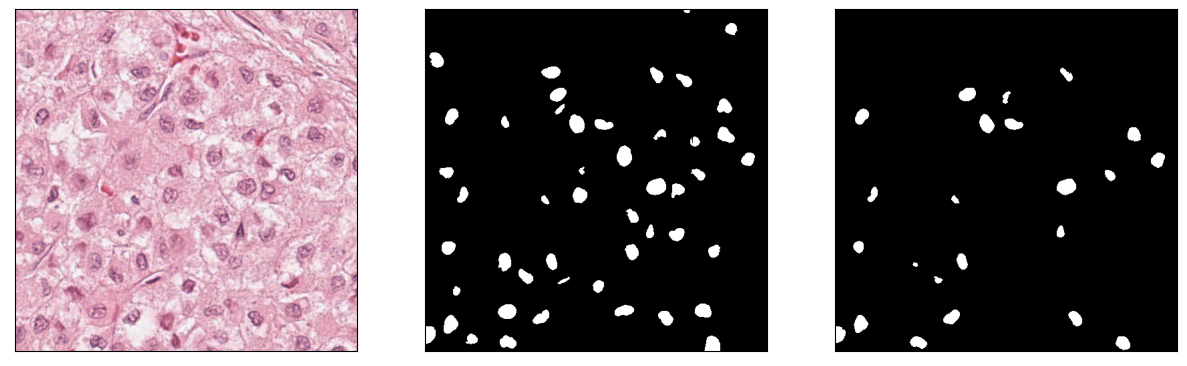

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.xticks([]); plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(hr_mask, cmap="gray")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(low_mask, cmap="gray")
plt.xticks([]); plt.yticks([])

In [54]:
dice_score

0.5818463123695122